In [1]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# y,x=[],[]
# for index,row in sched.iterrows():
#     session = fastf1.get_session(2024, row["Location"], 'R')
#     session.load()
#     sesr=session.results 
#     sesr["Intensity"]=sesr["GridPosition"]-sesr["Position"]
#     y.append(sesr["Intensity"].max())
#     print(y[-1],"----------------------------------------------------")
#     x.append(row["Location"])
location=input("Enter Race Location : ")
year=int(input("Enter year : "))

Enter Race Location :  Monaco
Enter year :  2021


In [3]:
session = fastf1.get_session(year, location, 'R')
session.load()
sesr=session.results 
# print(sesr)
sesr["Intensity"]=sesr["GridPosition"]-sesr["Position"]
grouped=sesr.groupby("TeamId")["Intensity"].mean()


req         WARNING 	DEFAULT CACHE ENABLED! (264.13 MB) C:\Users\GouriAmit\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	No cached data found for car_data. Loading data...
_api           INFO 	Fetching car data...
_api           INFO 	Parsing car data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for position_data. Loading data...
_api           INFO 	Fetching position data...
_api           INFO 	Parsing positio

In [4]:
grouped

TeamId
alfa            1.5
alphatauri      0.0
alpine          3.0
aston_martin    4.0
ferrari        -8.5
haas            2.0
mclaren         1.0
mercedes       -8.0
red_bull        3.0
williams        2.0
Name: Intensity, dtype: float64

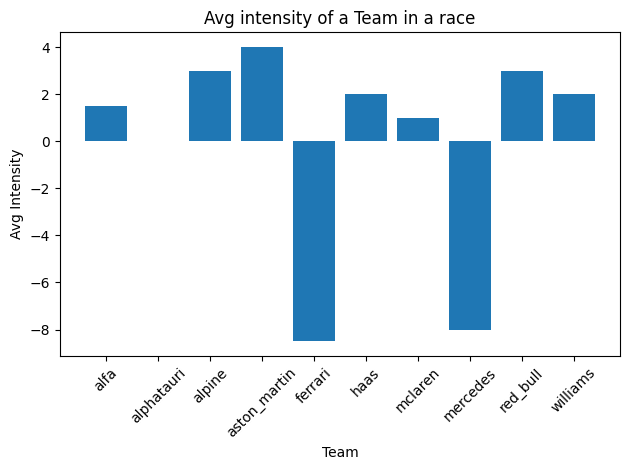

In [5]:
x=grouped.index
y=grouped.values
#learnt about the index and values methods
plt.bar(x,y)
plt.xticks(rotation=45)
plt.xlabel("Team")
plt.ylabel("Avg Intensity")
plt.title("Avg intensity of a Team in a race")
plt.tight_layout()
plt.savefig(f"{location}_team_intensity_avg.png")
plt.show()